The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). RRE operates in the following U.S. states: California, Florida, Michigan, Ohio, Pennsylvania, Texas. You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:

Provide a summary of the mean AQI for the states in which RRE operates.
Construct a boxplot visualization for AQI of these states using seaborn.
Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
Construct a confidence interval for the RRE state with the highest mean AQI.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.read_csv("c4 epa air dataset.csv")

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
...,...,...,...,...,...,...,...,...,...,...
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9


In [ ]:
ads = pd.read_csv("c4 epa air dataset.csv")

now let us spend some time exploring the dataframe

In [ ]:
print(ads.describe(include='all'))

        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \
count              257          

now let us observe the states .let us use the values_counts()")

In [ ]:
print(ads['state_name'].value_counts())

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

# Question: What time range does this data cover?

All of the sites collected data on January 1st, 2018.

# Question: What are the minimum and maximum AQI values observed in the dataset?

The minimum AQI value is 0 and the maximum AQI value is 50.

# Question: Are all states equally represented in the dataset?

No, all states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI.

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [ ]:
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

In [ ]:
ads_rre = ads[ads['state_name'].isin(rre_states)]

Seaborn is a simple visualization library, commonly imported as sns. Import seaborn below, then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [ ]:
import seaborn as sns

<Axes: xlabel='state_name', ylabel='aqi'>

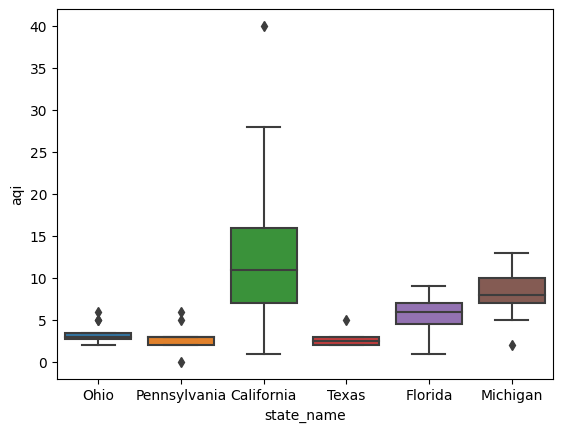

In [ ]:
sns.boxplot(x=ads_rre["state_name"],y=ads_rre["aqi"])

 Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

California: The mean and a signficant portion of the boxplot range over 10.
Michigan: While the mean is below 10, the boxplot ranges above 10.

Construct a confidence interval for the RRE state with the highest mean AQI
Recall the four-step process for constructing a confidence interval:

Identify a sample statistic.

Choose a confidence level.

Find the margin of error.

Calculate the interval.

now let us construct our sample statistics

In [ ]:
aqi_ca = ads[ads['state_name']=='California']


In [ ]:
sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

# Choose your confidence level
Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [ ]:
confidence_level = 0.95
confidence_level

0.95

# Find your margin of error (ME)
Recall margin of error = z * standard error, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

Find your z-value.

Find the approximate z for common confidence levels.

Calculate your standard error estimate.



Confidence  Level	Z



90%
	  1.65
95%
 	1.96
99%
 	2.58


# Begin by identifying the z associated with your chosen confidence level.

In [ ]:
z_value = 1.96

In [ ]:
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])

In [ ]:
print("standard error:")

standard error:


In [ ]:
print(standard_error)

0.8987209641127412


now let us use the above calculation to find the margin of error

In [ ]:
margin_of_error = standard_error * z_value

In [ ]:
print("margin of error:")
print(margin_of_error)

margin of error:
1.7614930896609726


# Calculate your interval
Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [ ]:
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

# Alternative: Construct the interval using scipy.stats.norm.interval()
scipy presents a simpler solution to developing a confidence interval. To use this, first import the stats module from scipy.



In [ ]:
from scipy import stats

In [ ]:
stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

<ipython-input-51-e12bc462ed8f>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)


(10.359751399400034, 13.882672843024208)

# Considerations
What are key takeaways from this lab?

Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change.
Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.
# What findings would you share with others?

Present this notebook to convey the analytical process and describe the methodology behind constructing the confidence interval.
Convey that a confidence interval at the 95% level of confidence from this sample data yielded [10.36 , 13.88], which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
Share how varying the confidence level changes the interval. For example, if you varied the confidence level to 99%, the confidence interval would become [9.80 , 14.43].
# What would you convey to external stakeholders?

Explain statistical significance at a high level.
Describe California's observed mean AQI and suggest focusing on that state.
Share the result of the 95% confidence interval, describing what this means relative to the threshold of 10.
Convey any potential shortcomings of this analysis, such as the short time period being referenced.